In [5]:
import numpy as np
import pandas as pd
import matplotlib as plot
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import shapiro
import statsmodels.api as sm
import pylab


In [34]:
data= pd.read_csv("hmelq.csv")

In [43]:
#data.head()

In [38]:
data2=data.copy()

In [45]:
#data2.head()

In [44]:
#data.head()

In [50]:
data2.dropna(inplace=True)
data2.head()


,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
153,0,18200,94727.0,136877.0,DebtCon,Mgr,15.0,0.0,0.0,168.96,2.0,26.0,36.056
154,0,21700,79240.0,96784.0,DebtCon,Mgr,5.0,0.0,0.0,64.51,6.0,24.0,38.079
155,0,34100,241931.0,36486.0,DebtCon,Mgr,1.0,0.0,2.0,196.01,3.0,50.0,42.459
156,0,8400,62989.0,76718.0,HomeImp,Mgr,3.0,0.0,2.0,131.47,0.0,22.0,29.200
157,0,17400,25859.0,43684.0,DebtCon,Mgr,16.0,1.0,0.0,95.36,1.0,17.0,27.108


In [51]:
#data.head()

In [9]:
data.isnull().sum()

bad        0
loan       0
mortdue    0
value      0
reason     0
job        0
yoj        0
derog      0
delinq     0
clage      0
ninq       0
clno       0
debtinc    0
dtype: int64

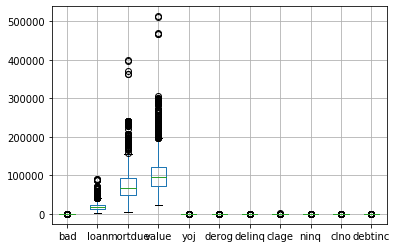

In [52]:
data2.boxplot()

In [79]:
shapiro(data2['clage'])
#değişken normal dağılmamıştır

(0.9051468372344971, 1.112704769060138e-33)

In [80]:
shapiro(data2['debtinc'])
#değişken normal dağılmamıştır

(0.8244601488113403, 1.8707334498736308e-42)

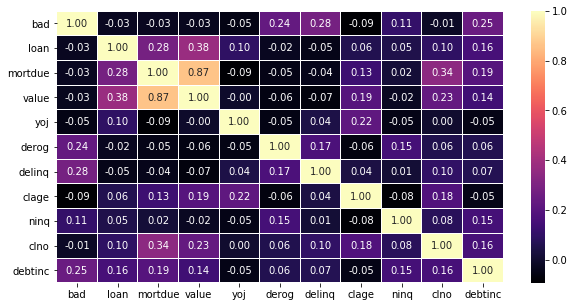

In [53]:
fig,ax = plt.subplots(figsize=(10, 5))
sns.heatmap(data2.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()

In [ ]:
#value ve loan arasında pozitif yönlü zayıf bir ilişki vardır(0,38)
#value ve mortdue arasında arasında pozitif yönlü güçlü bir ilişki vardır(0.87)
#clno ve mortdue arasında arasında pozitif yönlü zayıf bir ilişki vardır(0.34)

VALUE VE MORTDUE DEĞİŞKENLERİ ARASINDAKİ 0.87'LİK POZİTİF YÖNLÜ İLİŞKİNİN İNCELENMESİ

value(mülk değeri) arttıkça mortdue(ipotek değeri)de artmaktadır.

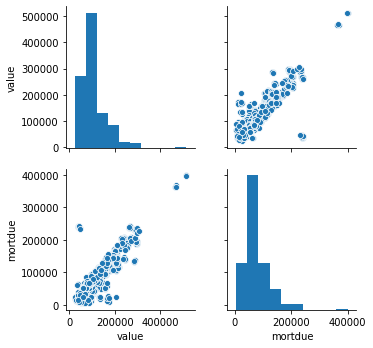

In [81]:
sns.pairplot(data2[["value","mortdue"]])
#saçılım grafiği incelendiğinde iki değişken arasında ilişki bulunmakta.

In [82]:
#plt.scatter(data2['value'],data2['mortdue'])

In [28]:
shapiro(data2.mortdue)
#H0: mortdue dağılımdan gelmektedir
#H1: mortdue dağılımdan gelmemektedir
#p-value<alpha H0 reddedilir.
#mortdue değişkeni normal dağılımdan gelmemektedir

(0.8624268174171448, 7.460412130575895e-39)

In [29]:
shapiro(data2.value)
#H0: value normal dağılımdan gelmektedir
#H0: value normal dağılımdan gelmemektedir
#p-value<alpha H0 reddedilir.
#value değişkeni normal dağılımdan gelmemektedir"

(0.8436811566352844, 1.0142738414629458e-40)

In [30]:
mort=data2['mortdue']
valuee=data2['value']

In [31]:
veri=pd.concat([mort,valuee],axis=1)
veri.colunms=["mortduee","valuee"]
veri.head()

C:\Users\karde\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


,mortdue,value
153,94727.0,136877.0
154,79240.0,96784.0
155,241931.0,36486.0
156,62989.0,76718.0
157,25859.0,43684.0


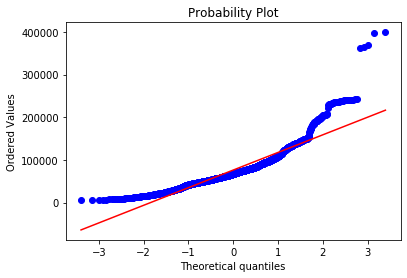

In [67]:
stats.probplot(veri['mortdue'], dist="norm",plot=pylab)
pylab.show()

In [32]:
import scipy as cipy
cipy.stats.ks_2samp(veri.mortdue,veri.value)
#H0: İki değişken aynı dağılımdan gelmektedir
#H0: İki değişken aynı dağılımdan gelmemektedir
#p<alpha olduğu için ho reddedilir.
#Mortdue ve Value değişkenleri aynı dağılımdan gelmemeştedir

Ks_2sampResult(statistic=0.3260654112983152, pvalue=2.494365282673778e-94)

In [33]:
#veriler normal dağılımdan gelmediği için normallik varsayımı olmadığındada kullanılan levene testinı uyguladık
#H0:İki grubun varyansları eşittir
#H1:İki grup varyansları arasında farklılık vardır
#p-value<alpha H0 reddedilir iki grup varyansı arasında farklılık vardır
stats.levene(veri.mortdue,veri.value)

LeveneResult(statistic=27.166309046206063, pvalue=1.960277648170479e-07)

VALUE VE LOAN ARASINDAKİ 0.34'LUK POZİTİF YÖNLÜ İLİŞKİNİN İNCELENMESİ

mülk değeri arttıkça talep edilen kredi miktarında zayıf bir artış gözlenir

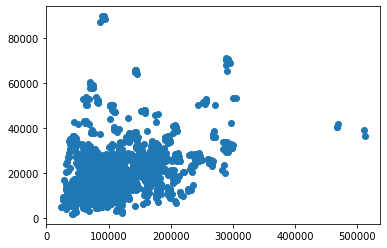

In [69]:
plt.scatter(data2['value'],data2['loan'])

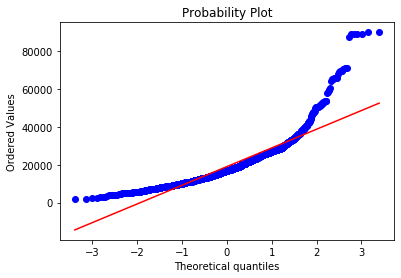

In [66]:
stats.probplot(veri2['loan'], dist="norm",plot=pylab)
pylab.show()

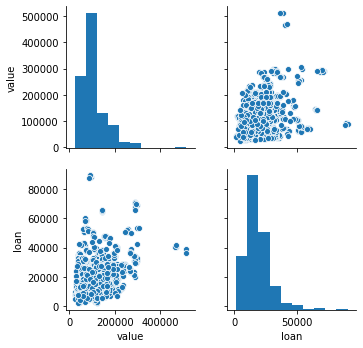

In [83]:
sns.pairplot(data2[["value","loan"]])

In [60]:
shapiro(data2.loan)
#H0: loan dağılımdan gelmektedir
#H1: loan dağılımdan gelmemektedir
#p-value<alpha H0 reddedilir.
#loan değişkeni normal dağılımdan gelmemektedir

(0.8360166549682617, 1.9721874586907475e-41)

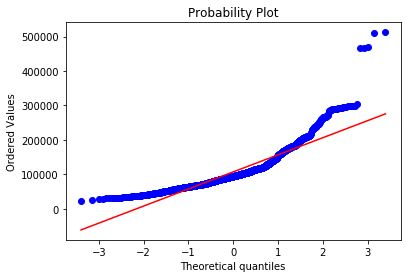

In [65]:
stats.probplot(veri2['value'], dist="norm",plot=pylab)
pylab.show()

In [84]:
#sns.pairplot(data2[["value"]])

In [58]:
loann=data2['loan']
valuee=data2['value']

In [59]:
veri2=pd.concat([loann,valuee],axis=1)
veri2.colunms=["loan","value"]
veri2.head()

C:\Users\karde\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


,loan,value
153,18200,136877.0
154,21700,96784.0
155,34100,36486.0
156,8400,76718.0
157,17400,43684.0


In [64]:
cipy.stats.ks_2samp(veri2.loan,veri2.value)
#H0: İki değişken aynı dağılımdan gelmektedir
#H0: İki değişken aynı dağılımdan gelmemektedir
#p<alpha olduğu için ho reddedilir.
#Mortdue ve Value değişkenleri aynı dağılımdan gelmemeştedir

Ks_2sampResult(statistic=0.9365708622398414, pvalue=0.0)

In [70]:
#H0:İki grubun varyansları eşittir
#H1:İki grup varyansları arasında farklılık vardır
#p-value<alpha H0 reddedilir iki grup varyansı arasında farklılık vardır
stats.levene(veri2.loan,veri2.value)

LeveneResult(statistic=949.7865923817392, pvalue=1.7801999732710778e-187)

CLNO VE MORTDUE ARASINDAKİ İLİŞKİNİN İNCELENMESİ


In [71]:
shapiro(data2['clno'])
#veri normal dağılımdan gelmemektedir

(0.964141309261322, 5.696766726335972e-22)

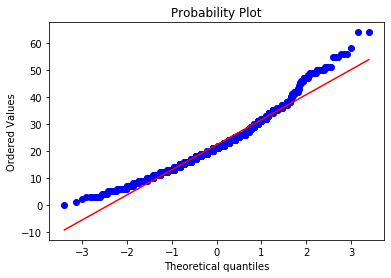

In [77]:
stats.probplot(veri3['clno'], dist="norm",plot=pylab)
pylab.show()

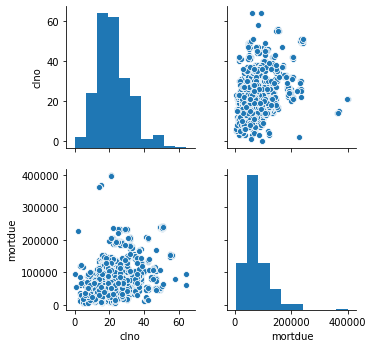

In [85]:
sns.pairplot(data2[["clno","mortdue"]])

In [72]:
clnoo=data2['clno']
mortduee=data2['mortdue']

In [74]:
veri3=pd.concat([clnoo,mortduee],axis=1)
veri3.colunms=["clno","mortdue"]
veri3.head()

C:\Users\karde\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


,clno,mortdue
153,26.0,94727.0
154,24.0,79240.0
155,50.0,241931.0
156,22.0,62989.0
157,17.0,25859.0


In [75]:
cipy.stats.ks_2samp(veri3.clno,veri3.mortdue)
#iki değişken aynı dağılımdan gelmemekte

Ks_2sampResult(statistic=1.0, pvalue=0.0)

In [76]:
stats.levene(veri3.clno,veri3.mortdue)
#iki değişkenin varyansları homojen değildir

LeveneResult(statistic=1629.7376830350515, pvalue=1.3475821370424798e-299)